In [73]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.layers import Normalization , Dense , InputLayer
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError , Huber , MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("car_train.csv.zip", sep=",")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [17]:
data.shape

(1000, 12)

In [18]:
columns_to_remove = ['v.id' , 'on road old' , 'on road now']
data_filtered = data.drop(columns=columns_to_remove)

In [19]:
sns.pairplot(data , diag_kind='kde')


Output hidden; open in https://colab.research.google.com to view.

In [20]:
tensor_data=tf.constant(data)
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[2.830000e+02 6.649830e+05 7.368380e+05 3.000000e+00 9.549500e+04
  2.000000e+00 9.000000e+00 1.000000e+01 1.370000e+02 5.600000e+01
  7.800000e+01 3.485350e+05]
 [6.160000e+02 6.570600e+05 7.271370e+05 2.000000e+00 1.112900e+05
  1.000000e+00 3.000000e+00 1.100000e+01 1.830000e+02 8.000000e+01
  8.200000e+01 2.472775e+05]
 [5.860000e+02 5.891650e+05 8.071500e+05 6.000000e+00 5.307500e+04
  5.000000e+00 7.000000e+00 9.000000e+00 2.000000e+02 7.300000e+01
  1.170000e+02 4.921710e+05]
 [2.200000e+02 5.663920e+05 8.233620e+05 6.000000e+00 1.012870e+05
  5.000000e+00 1.000000e+00 1.000000e+01 1.400000e+02 5.500000e+01
  7.400000e+01 2.875885e+05]
 [4.700000e+02 5.200160e+05 7.544940e+05 7.000000e+00 1.233830e+05
  4.000000e+00 1.000000e+00 1.200000e+01 1.640000e+02 7.700000e+01
  1.090000e+02 1.360790e+05]], shape=(5, 12), dtype=float64)


In [21]:
# @title Default title text
X = tensor_data[: , 3:-1]
print(X.shape)

(1000, 8)


In [54]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [56]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [57]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO) :int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO) :int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [60]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)): ]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)) : ]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [61]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.88831705, -0.16730788, -0.71882874,  1.2201259 , -0.7369134 ,
        -1.5246301 , -1.3571666 , -1.1982203 ],
       [-1.469391  ,  0.37343946, -1.4358647 , -0.89646393, -0.28962126,
         0.84883803, -0.19367298, -1.0102179 ],
       [ 0.85490483, -1.6195714 ,  1.4322791 ,  0.514596  , -1.1842055 ,
         1.7259892 , -0.5330253 ,  0.6348021 ],
       [ 0.85490483,  0.03098326,  1.4322791 , -1.6019939 , -0.7369134 ,
        -1.3698387 , -1.4056456 , -1.3862225 ],
       [ 1.4359788 ,  0.7874476 ,  0.71524316, -1.6019939 ,  0.15767089,
        -0.1315075 , -0.3391097 ,  0.25879756]], dtype=float32)>

In [22]:
y = tensor_data[: , -1]
y=tf.expand_dims(y , axis = -1)
print(y.shape)

(1000, 1)


In [76]:
model = tf.keras.Sequential([
                             InputLayer(input_shape= (8 ,)),
                             normalizer,
                            Dense(128 , activation = "relu"),
                            Dense(128 , activation = "relu"),
                            Dense(128 , activation = "relu"),
                             Dense(1),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 128)               1152      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

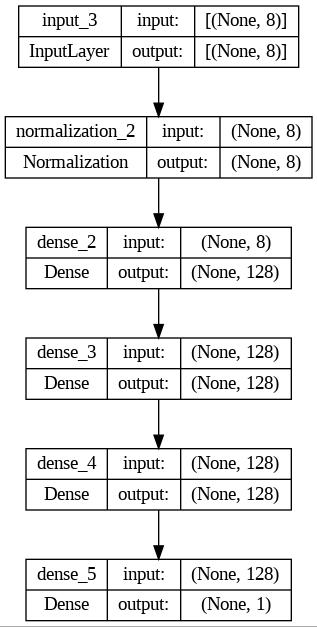

In [77]:
tf.keras.utils.plot_model(model , to_file="model.jpg" , show_shapes=True)

In [78]:
model.compile( optimizer = Adam (learning_rate = 0.1), loss = MeanAbsoluteError() ,  metrics = RootMeanSquaredError())

In [79]:
history = model.fit(X_train , y_train , validation_data = (X_val , y_val) , epochs = 100 , verbose = 1)

Epoch 1/100
25/25 [==============================] - 1s 14ms/step - loss: 140910.4219 - root_mean_squared_error: 191762.9688 - val_loss: 63660.3633 - val_root_mean_squared_error: 77673.8516
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 50346.8203 - root_mean_squared_error: 61995.7070 - val_loss: 47626.2812 - val_root_mean_squared_error: 61337.9453
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 45778.8711 - root_mean_squared_error: 57174.6602 - val_loss: 49068.4453 - val_root_mean_squared_error: 61593.3789
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 45236.5312 - root_mean_squared_error: 55462.7266 - val_loss: 45282.6484 - val_root_mean_squared_error: 55191.3320
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 42534.9258 - root_mean_squared_error: 52652.3945 - val_loss: 41075.3633 - val_root_mean_squared_error: 51614.2695
Epoch 6/100
25/25 [==============================] - 0s 6ms/st

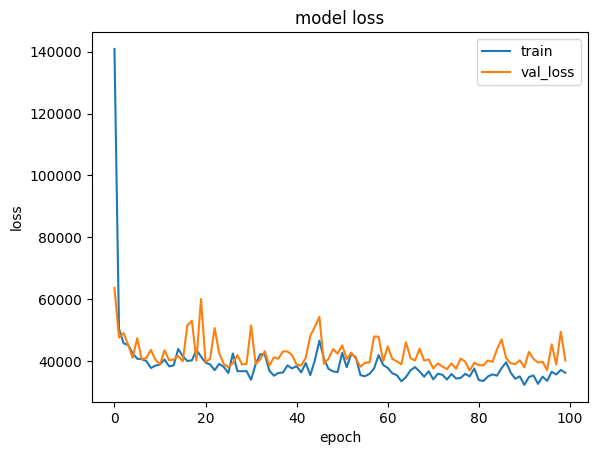

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' , 'val_loss'])
plt.show()

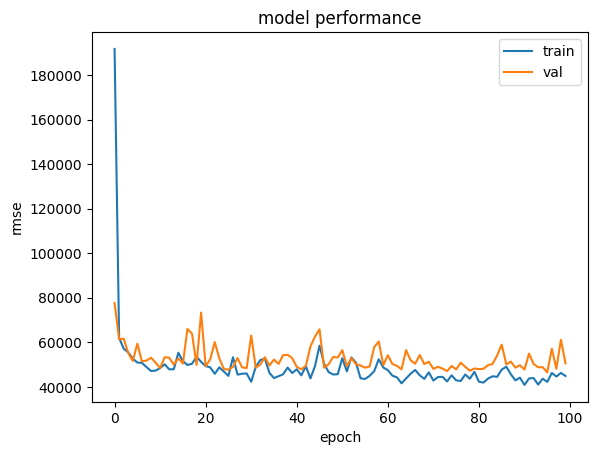

In [81]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train' , 'val'])
plt.show()

In [82]:
history.history

{'loss': [140910.421875,
  50346.8203125,
  45778.87109375,
  45236.53125,
  42534.92578125,
  40777.4921875,
  40654.15625,
  40019.8125,
  37787.9765625,
  38544.09375,
  38919.80078125,
  40535.94921875,
  38306.26171875,
  38629.14453125,
  43927.28515625,
  41587.5546875,
  40058.3359375,
  40243.9609375,
  43653.734375,
  41489.5390625,
  39525.7890625,
  38928.8671875,
  37091.5390625,
  39108.6640625,
  38141.8359375,
  36155.5703125,
  42471.546875,
  36773.7421875,
  36746.89453125,
  36763.546875,
  33961.43359375,
  39051.13671875,
  42236.2265625,
  42185.44140625,
  36969.65234375,
  35307.17578125,
  36161.1484375,
  36319.37890625,
  38630.3046875,
  37640.0625,
  38392.69921875,
  36376.99609375,
  39397.03125,
  35465.28515625,
  40251.421875,
  46627.3515625,
  40749.42578125,
  37497.453125,
  36668.0,
  36456.58203125,
  42673.66015625,
  38028.69140625,
  42397.859375,
  41249.71484375,
  35470.171875,
  35115.734375,
  35893.63671875,
  37608.12890625,
  41946.34

In [83]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 6ms/step - loss: 37583.9492 - root_mean_squared_error: 45711.1484


[37583.94921875, 45711.1484375]

In [84]:
model.predict(tf.expand_dims(X_test[0] , axis =0))

1/1 [==============================] - 0s 105ms/step


array([[246041.12]], dtype=float32)

In [86]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([304445.])>

In [87]:
y_true = list(y_test[: ,0].numpy())

In [88]:
y_pred = list(model.predict(X_test)[: , 0])
print(y_pred)

4/4 [==============================] - 0s 6ms/step
[246041.17, 390049.5, 202323.03, 226905.1, 470300.28, 101324.02, 336506.75, 163816.3, 402863.94, 145455.44, 469898.6, 194608.75, 405860.9, 437015.78, 173893.36, 325584.9, 84582.77, 259220.38, 229816.81, 330959.47, 290426.8, 278762.28, 310118.88, 435706.5, 383055.97, 322254.38, 437338.75, 463540.5, 418897.28, 336254.97, 172890.36, 256928.75, 108623.516, 365671.97, 383124.5, 165670.16, 476803.03, 425285.2, 170183.45, 176073.33, 331774.66, 461061.8, 466120.62, 138899.33, 231166.0, 419456.06, 430994.22, 208445.75, 431804.0, 378347.88, 168623.03, 336283.53, 256927.3, 370642.66, 333095.5, 203628.84, 469720.72, 246465.84, 136699.64, 126812.27, 311724.75, 219558.53, 118458.02, 369238.3, 231920.83, 339545.06, 181535.84, 153979.34, 162264.39, 334977.16, 252738.69, 290713.22, 462720.94, 183758.0, 485406.25, 434848.53, 275544.25, 237262.5, 387617.2, 276814.5, 135557.69, 211309.2, 305958.22, 95154.85, 204110.03, 460422.62, 337602.38, 123016.555, 50

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


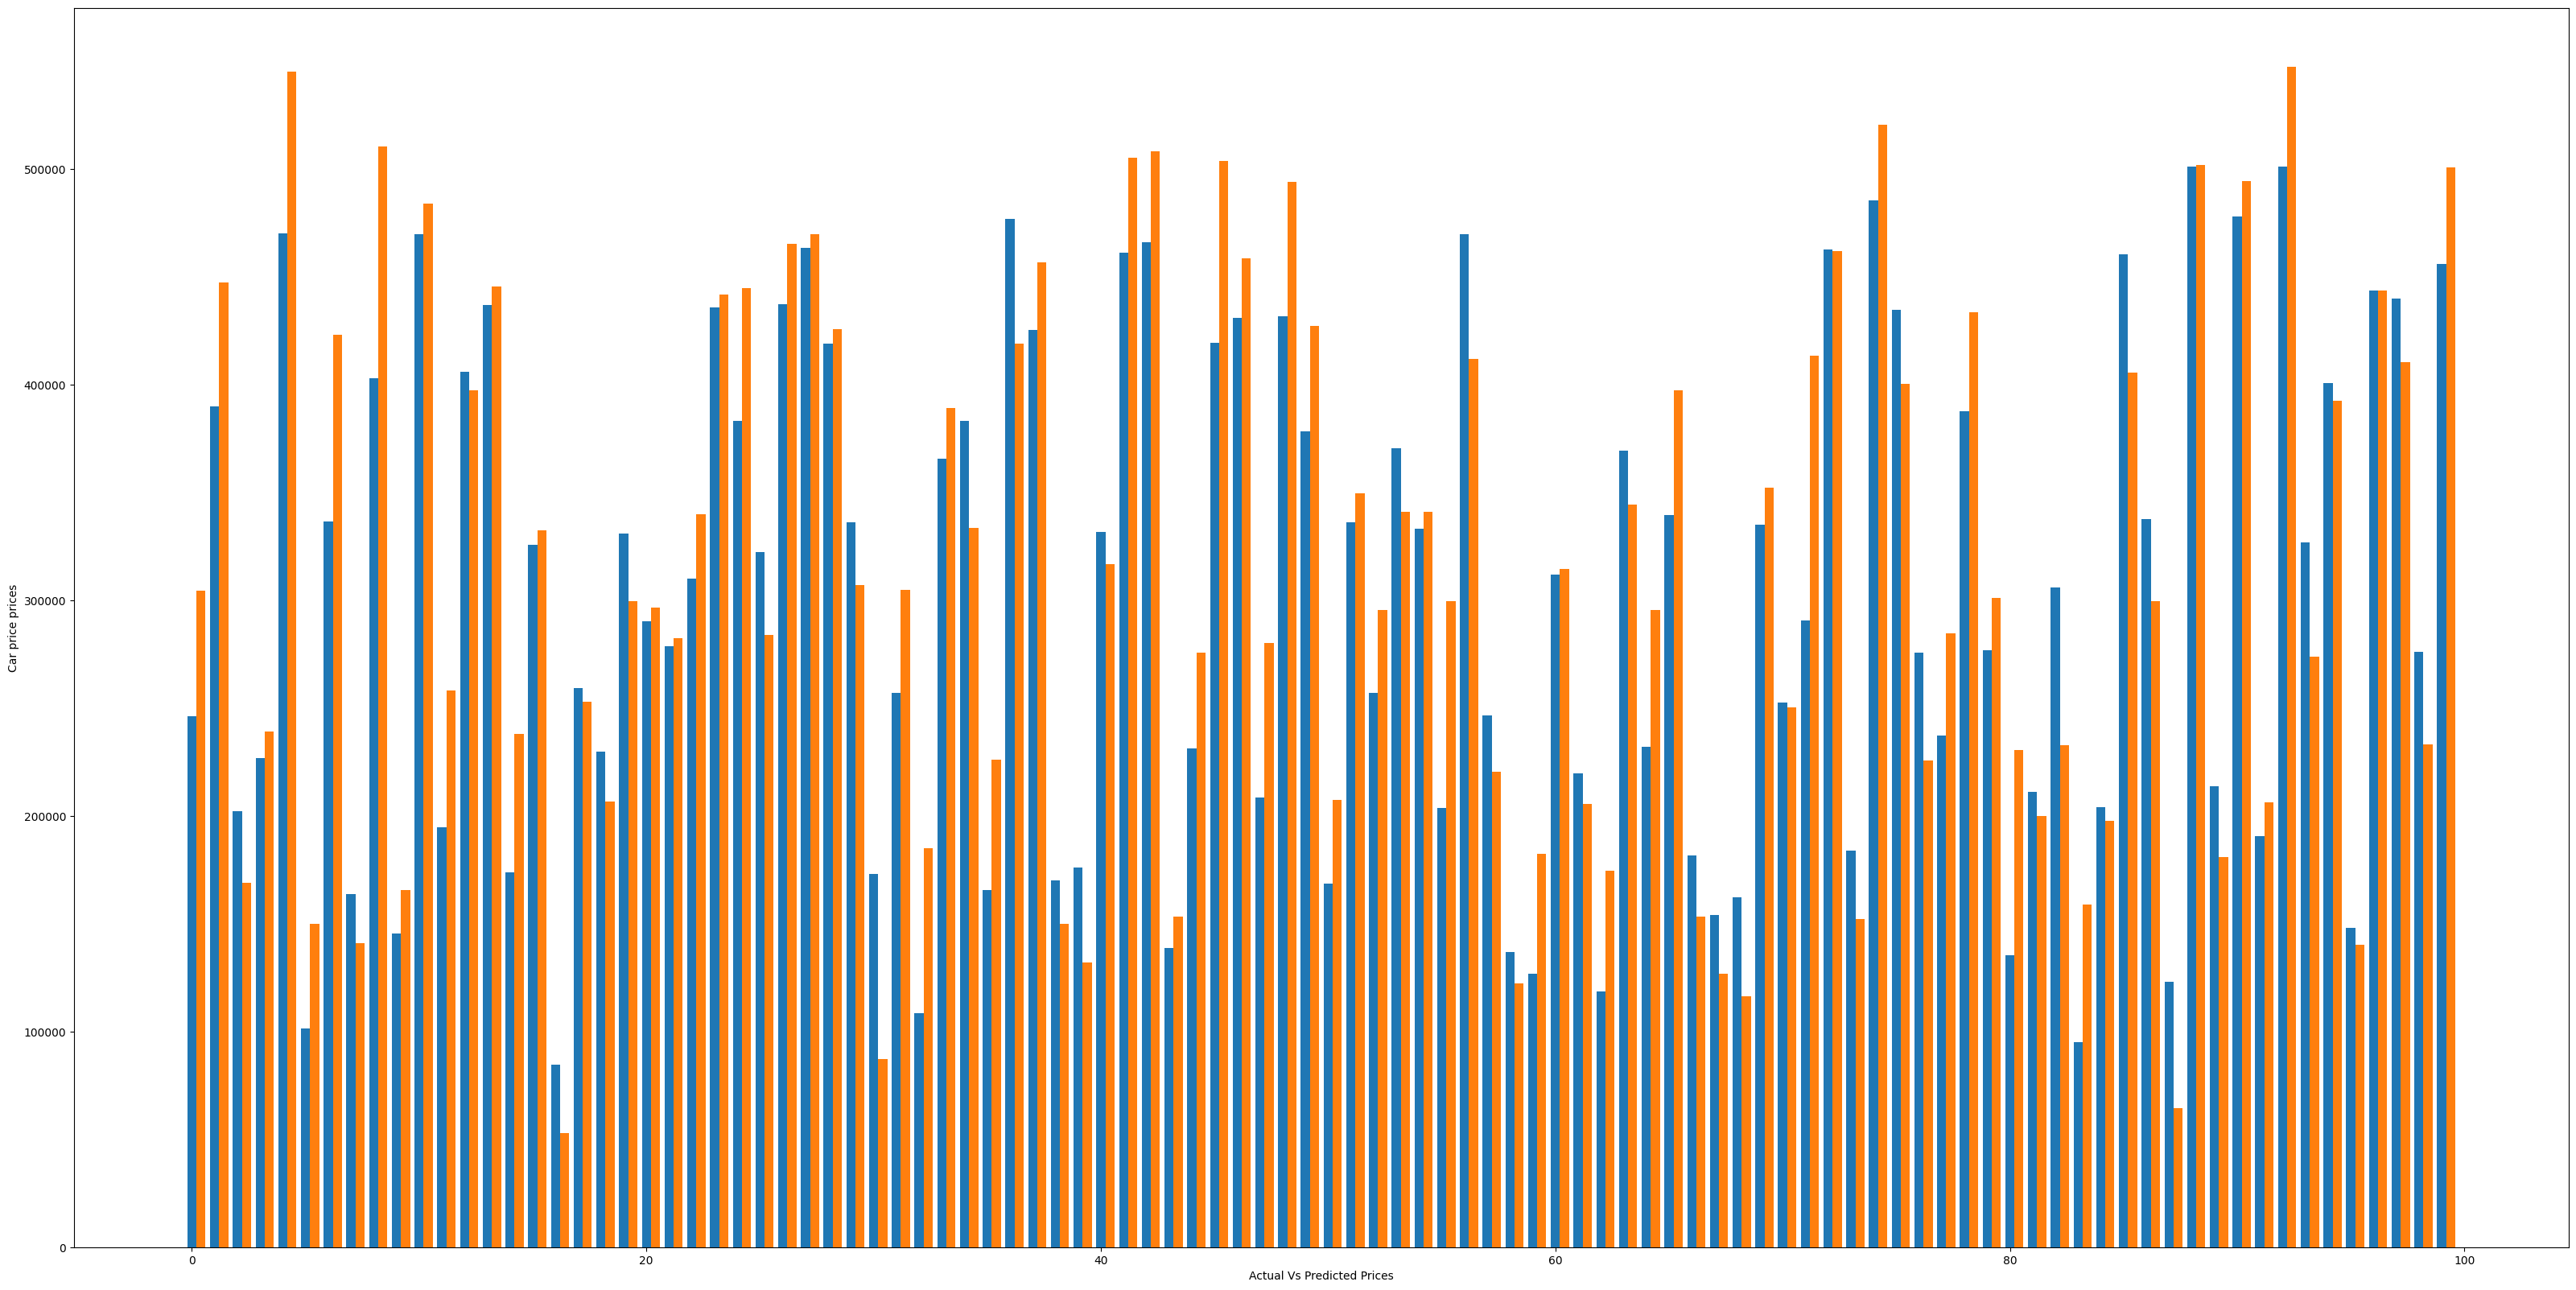

In [89]:
ind = np.arange(100)
print (ind)
plt.figure(figsize= (40,20))
width=0.4
plt.bar(ind,y_pred,width,label='predicted Car Price')
plt.bar(ind + width ,y_true , width , label = 'Actual Car Price' )

plt.xlabel('Actual Vs Predicted Prices')
plt.ylabel('Car price prices')

plt.show()